In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output

%matplotlib inline

In [37]:
U = 1 # convection velocity 
dx = 0.02 # step along x
dt = 0.01
t_final = 10
x_max = 10
x = np.arange(0, x_max+dx, dx)
t = np.arange(0, t_final+dt, dt)
courant = U*dt/dx
print(courant)

0.5


In [38]:
def init_square(x):
    result = 0
    if x > 0.1 and x < 0.3:
        result = 1
    return result
square = np.vectorize(init_square)

gauss = lambda x: np.exp(-10*(4*x-1)**2)

In [39]:
grid = np.zeros([len(t), len(x)])
grid[0, :] = square(x)
for i_t in range(len(t)-1):
    for i_x in range(len(x)):
        grid[i_t + 1, i_x] = grid[i_t, i_x] - courant * (grid[i_t, i_x] - grid[i_t, i_x-1])

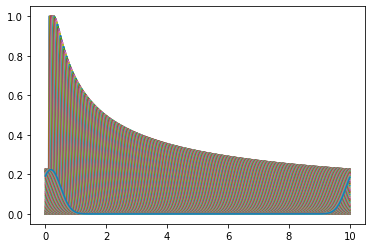

In [40]:
for i in range(len(t)):
    plt.plot(x, grid[i, :])

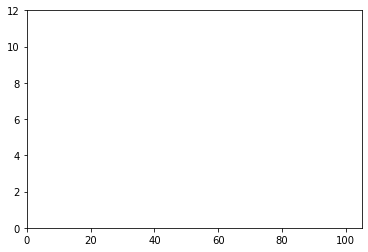

In [41]:
x_data = []
y_data = []

fig, ax = plt.subplots()
ax.set_xlim(0, 105)
ax.set_ylim(0, 12)
line, = ax.plot(0, 0)

def animation_frame(i):
    x_data.append(i*10)
    y_data.append(i)
    
    line.set_xdata(x_data)
    line.set_ydata(y_data)
    return line,

animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, 10, 0.01), interval=10)
plt.show()